In [31]:
import pandas as pd
import numpy as np



In [32]:
#arff_file = arff.loadarff("C:\Users\USER\Documents\ArghyaAIML_5th\09.09.2024\WISDM_AR_v1.1_transformed.arff")
df = pd.read_csv('csv_result-WISDM_ar_v1.csv')
df.head()
#print(df.columns)




,id,UNIQUE_ID,user,X0,X1,X2,X3,X4,X5,X6,...,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,RESULTANT,class{
0,1,1,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,...,293.94,1550,3.29,7.21,4.00,4.05,8.17,4.05,11.96,Jogging
1,2,2,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,...,269.44,1233.33,4.23,6.88,4.05,5.43,8.19,5.43,12.05,Jogging
2,3,3,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,...,248.65,1780,4.18,6.89,4.07,5.55,8.19,5.55,11.99,Jogging
3,4,4,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,...,709.09,1380,2.26,4.13,2.49,2.87,4.95,2.87,10.69,Walking
4,5,5,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,...,3300,1775,2.29,3.94,2.41,3.08,4.64,3.08,10.80,Walking


In [33]:
df.replace('?', np.nan, inplace= True)
df.dropna(inplace= True)

In [34]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(y)

['Jogging' 'Jogging' 'Jogging' ... 'Downstairs' 'Downstairs' 'Downstairs']


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
#print(X_train)
print(y_train)

['Jogging' 'Walking' 'Jogging' ... 'Sitting' 'Walking' 'Walking']


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

dtc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(knn)
ovr.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

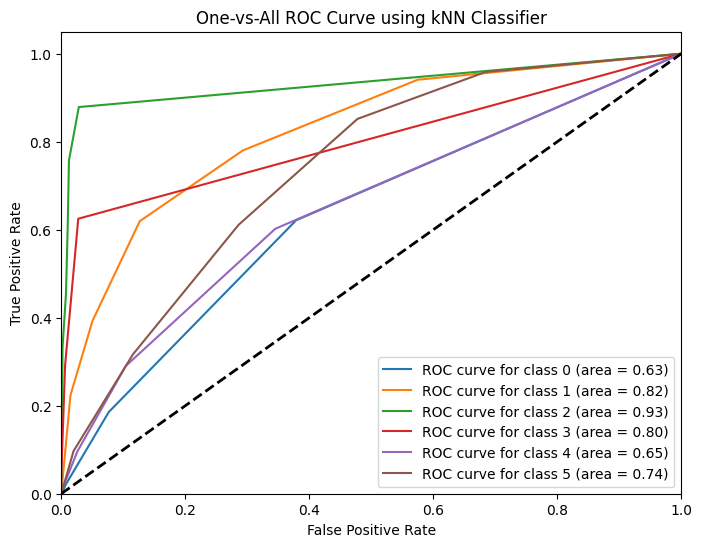

In [38]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes = np.unique(y_test))

dtc_prob = dtc.predict_proba(x_test)
knn_prob = knn.predict_proba(x_test)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
y_score = ovr.predict_proba(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
import matplotlib.pyplot as plt
# Plotting the ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-All ROC Curve using kNN Classifier')
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
y_pred_dtc = dtc.predict(x_test)
y_pred_knn = knn.predict(x_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of Decision Tree: {accuracy_dtc:.2f}")
print(f"Accuracy of KNeighbours: {accuracy_knn:.2f}")

Accuracy of Decision Tree: 0.84
Accuracy of KNeighbours: 0.55
